# Arabic Semantic Textual Similarity

In [71]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
language = "Arabic"
train = pd.read_csv("train.csv", sep="\t")
test = pd.read_csv("test.csv", sep="\t")

Let's see what are the rows in train and test datasets

In [74]:
train[:10]

,id,sentence_1,sentence_2,similarity
0,0,لكن مصادر أخرى مقربة من المزاد قالت بأن فيفن...,لكن مصادر أخرى مقربة من المزاد قالت بأن فيفند...,4.000
1,1,ستكون الترقية متاحة للتنزيل مجانا للعملاء الحا...,سيكون الدعم بمثابة ترقية للبرمجيات الحرة التي ...,2.600
2,2,"""لم يصرح مسؤولون أمريكيون عما إذا كانت القوات ...",لم يصرح المسؤولون عما إذا كانت القوات الأمريكي...,4.000
3,3,تستعر المعركة حول فيريساين على خدمة الموقع الم...,أدخلت شركة فيري ساين خدمتها لموقع المستكشف في ...,1.750
4,4,تم وضع دروس الليلة الماضية في غرفة العزل في ال...,قالت أن دروس مازال محتجزا في السجن، وهو الآن ف...,4.500
5,5,أصيبت اميلي ، البالغة من العمر51 عاما ، بالسار...,توفي أول العاملين في مجال الرعاية الصحية في ال...,3.250
6,6,وقد استسلم قائدهم، أبو بكر الأزدي، في يونيو؛ ح...,وقد سلم زعيمهم، أبو بكر الأزدي، نفسه في شهر حز...,5.000
7,7,أجل ملك مقاطعة المحكمة العليا القاضي تشارلز مل...,بعد البيان الافتتاحي فريتاس، أجل ملك مقاطعة ال...,3.000
8,8,داعمو جوجل في مراحلها الأولى هم :جامعة ستانفور...,نوهت الصحيفة أن مسثمري جوجل هي مؤسسات رأسمال...,2.800
9,9,طغت الاحتفالات والتجمعات بمناسبة الذكرى السادس...,الأول من يوليو هو الذكرى السادسة لعودة هونغ كو...,2.667


In [75]:
train.describe()

,id,similarity
count,1081.000000,1081.000000
mean,540.000000,3.094003
std,312.202125,1.480067
min,0.000000,0.000000
25%,270.000000,2.250000
50%,540.000000,3.400000
75%,810.000000,4.400000
max,1080.000000,5.000000


In [76]:
test[:10]

,id,sentence_1,sentence_2,similarity
0,0,شخص ما يحمل لوح التزلج ليلا على الرصيف.,رجل جالس بمفرده يقرأ على طاولة مستديرة ، خارج ...,0.8
1,1,تتسابق النساء في سباق الدايتونا 500.,يتسابق بعض الرجال ضمن مسابقة التزلج.,1.0
2,2,تمشي النساء جنبا إلى جنب.,هناك فتيات يمشين متجاورات,2.6
3,3,يقفز الرجل ذو القميص الأخضر عاليا على العشب.,يمشي الرجل ذو القميص الأبيض على العشب الطويل م...,2.2
4,4,رجلان يجلسان على العشب ومعهما موز.,ثلاثة رجال يتسكعون عند فرشة بيع الفاكهة.,1.4
5,5,كومة من الصخور تحمل علامات غريبة ، تسببت في تج...,يسير بعض الأشخاص على بعض الصخور الموجودة في ال...,1.8
6,6,ساعدت النساء أحد العدائين الذي كان قد سقط ، لل...,كانت المرأة تضع المكياج.,0.4
7,7,تشتري المرأة الغَزْل.,تبيع إحدى النساء المحصول.,1.4
8,8,تهرول امرأة في أحد الأزقة ، مرتدية ملابس سوداء .,يسير شاب ذو سترة سوداء على الرصيف.,1.0
9,9,إنه حفل موسيقي.,يقدم شخصٌ حفلا موسيقيا.,2.8


In [77]:
def convert(row):
    if row['similarity'] <= 1.0:
        return '0-1'
    elif 1.0 < row['similarity'] <= 2.0:
        return '1-2'
    elif 2.0 < row['similarity'] <= 3.0:
        return '2-3'
    elif 3.0 < row['similarity'] <= 4.0:
        return '3-4'
    else:
        return '4-5'

train['category'] = train.apply(convert, axis=1)
test['category'] = test.apply(convert, axis=1)

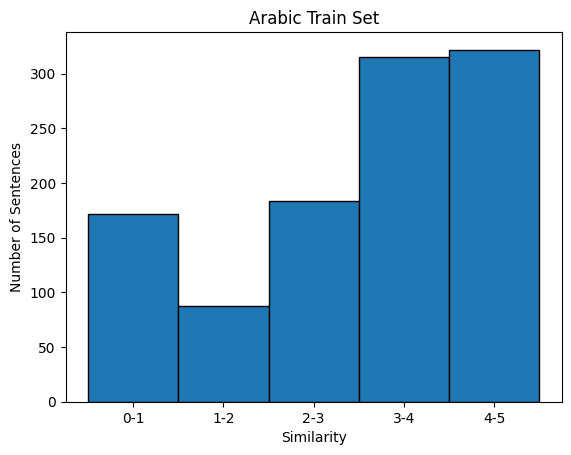

In [78]:
train.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Train Set")
plt.show()

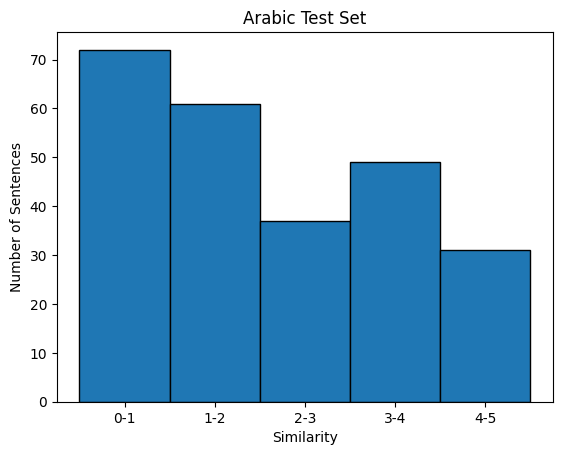

In [79]:
test.groupby("category")['id'].count().plot.bar(width=1,edgecolor = "black",xlabel="Similarity", ylabel="Number of Sentences", rot=0)
plt.title(language + " Test Set")
plt.show()

In [80]:
def normalized_word_Common(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0* len(w1 & w2)

def normalized_word_Total(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1* (len(w1) + len(w2))

def normalized_word_share(row, column_1, column_2):
    w1 = set(map(lambda word: word.lower().strip(), row[column_1].split()))
    w2 = set(map(lambda word: word.lower().strip(), row[column_2].split()))
    return 1.0*len(w1 & w2) / (len(w1) + len(w2))

def prepare_frequencies(df, id_column, column_1, column_2):
    df['freq_1'] = df.groupby(id_column)[id_column].transform('count')
    df['freq_2'] = df.groupby(id_column)[id_column].transform('count')
    df['s1len'] = df[column_1].str.len()
    df['s2len'] = df[column_2].str.len()
    df['s1_n_words'] = df[column_1].apply(lambda row :len(row.split(" ")))
    df['s2_n_words'] = df[column_2].apply(lambda row :len(row.split(" ")))

    df['word_Common'] = df.apply(normalized_word_Common, args=(column_1,column_2), axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, args=(column_1,column_2), axis = 1)
    df['word_share'] = df.apply(normalized_word_share, args=(column_1,column_2), axis = 1)

    df['freq_s1+s2'] = df['freq_1'] + df['freq_2']
    df['freq_s1-s2'] = abs(df['freq_1'] - df['freq_2'])

    return df


In [81]:
train = prepare_frequencies(train, "id", "sentence_1", "sentence_2")
test = prepare_frequencies(test, "id", "sentence_1", "sentence_2")

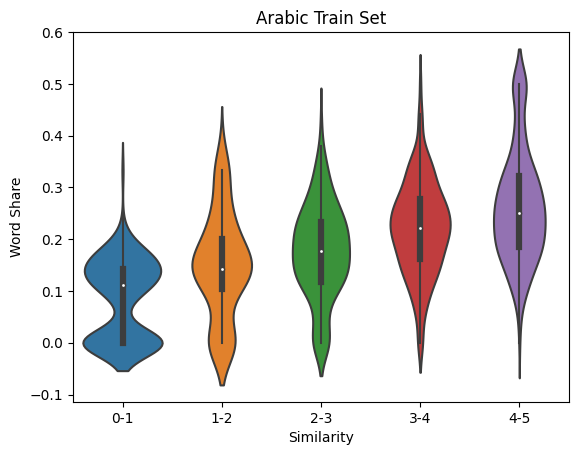

In [82]:
ax = sns.violinplot(x = 'category', y='word_share', data = train[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Train Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

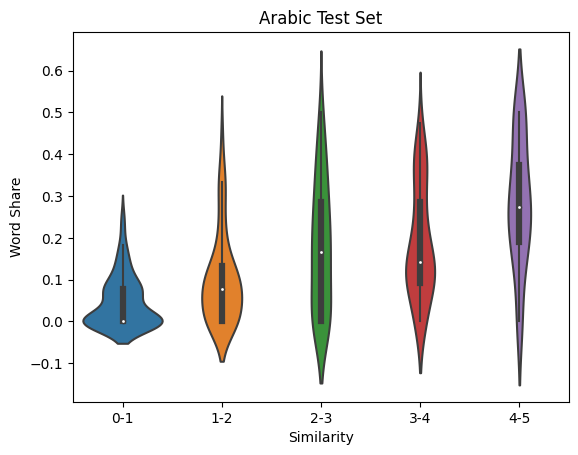

In [83]:
ax = sns.violinplot(x = 'category', y='word_share', data = test[0:], order=[ "0-1", "1-2", "2-3", "3-4", "4-5"])
ax.set_title(language + " Test Set")
ax.set_xlabel('Similarity')
ax.set_ylabel('Word Share')
plt.show()

In [84]:
train[:10]

,id,sentence_1,sentence_2,similarity,category,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
0,0,لكن مصادر أخرى مقربة من المزاد قالت بأن فيفن...,لكن مصادر أخرى مقربة من المزاد قالت بأن فيفند...,4.000,3-4,1,1,116,156,24,30,15.0,47,0.319149,2,0
1,1,ستكون الترقية متاحة للتنزيل مجانا للعملاء الحا...,سيكون الدعم بمثابة ترقية للبرمجيات الحرة التي ...,2.600,2-3,1,1,94,103,16,18,2.0,33,0.060606,2,0
2,2,"""لم يصرح مسؤولون أمريكيون عما إذا كانت القوات ...",لم يصرح المسؤولون عما إذا كانت القوات الأمريكي...,4.000,3-4,1,1,160,126,26,22,14.0,47,0.297872,2,0
3,3,تستعر المعركة حول فيريساين على خدمة الموقع الم...,أدخلت شركة فيري ساين خدمتها لموقع المستكشف في ...,1.750,1-2,1,1,69,56,12,10,0.0,22,0.000000,2,0
4,4,تم وضع دروس الليلة الماضية في غرفة العزل في ال...,قالت أن دروس مازال محتجزا في السجن، وهو الآن ف...,4.500,4-5,1,1,56,60,12,13,5.0,23,0.217391,2,0
5,5,أصيبت اميلي ، البالغة من العمر51 عاما ، بالسار...,توفي أول العاملين في مجال الرعاية الصحية في ال...,3.250,3-4,1,1,124,164,22,31,7.0,48,0.145833,2,0
6,6,وقد استسلم قائدهم، أبو بكر الأزدي، في يونيو؛ ح...,وقد سلم زعيمهم، أبو بكر الأزدي، نفسه في شهر حز...,5.000,4-5,1,1,118,126,21,24,15.0,41,0.365854,2,0
7,7,أجل ملك مقاطعة المحكمة العليا القاضي تشارلز مل...,بعد البيان الافتتاحي فريتاس، أجل ملك مقاطعة ال...,3.000,2-3,1,1,79,117,13,20,8.0,32,0.250000,2,0
8,8,داعمو جوجل في مراحلها الأولى هم :جامعة ستانفور...,نوهت الصحيفة أن مسثمري جوجل هي مؤسسات رأسمال...,2.800,2-3,1,1,116,106,17,20,4.0,35,0.114286,2,0
9,9,طغت الاحتفالات والتجمعات بمناسبة الذكرى السادس...,الأول من يوليو هو الذكرى السادسة لعودة هونغ كو...,2.667,2-3,1,1,95,66,16,12,5.0,28,0.178571,2,0


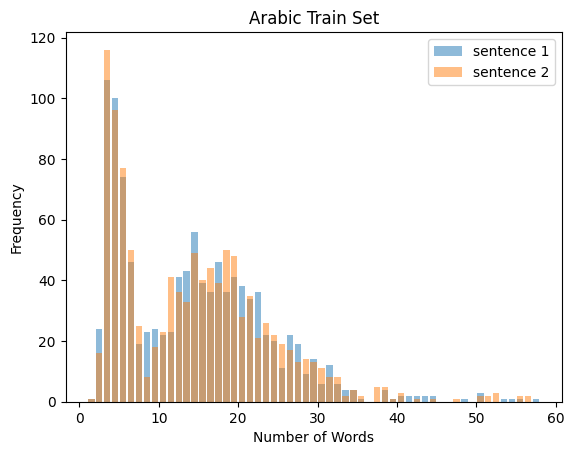

In [85]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(train['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(train['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Train Set")
plt.legend()
plt.show()

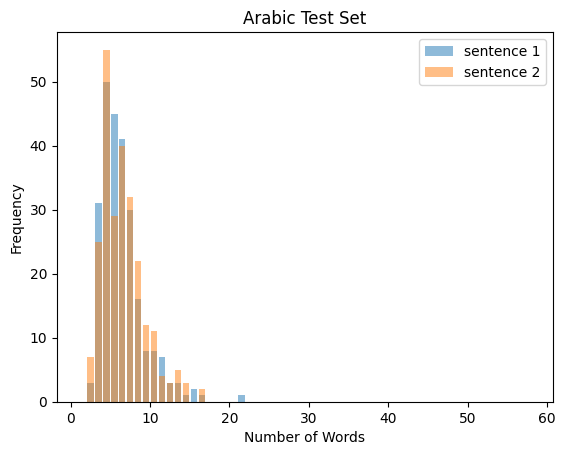

In [86]:
bin_edges = range(min(train['s1_n_words']), max(train['s1_n_words']) + 2, 1)
plt.hist(test['s1_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 1")
plt.hist(test['s2_n_words'], bins=bin_edges, rwidth=0.8, alpha=0.5, label="sentence 2")
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title(language + " Test Set")
plt.legend()
plt.show()

In [87]:
train.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,1081.000000,1081.000000,1081.0,1081.0,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.000000,1081.0,1081.0
mean,540.000000,3.094003,1.0,1.0,76.530065,76.949121,13.847364,13.997225,5.882516,26.382979,0.198935,2.0,0.0
std,312.202125,1.480067,0.0,0.0,52.181017,53.147717,9.396011,9.641874,5.086118,16.804030,0.112156,0.0,0.0
min,0.000000,0.000000,1.0,1.0,1.000000,4.000000,1.000000,1.000000,0.000000,4.000000,0.000000,2.0,0.0
25%,270.000000,2.250000,1.0,1.0,27.000000,26.000000,5.000000,5.000000,1.000000,10.000000,0.130435,2.0,0.0
50%,540.000000,3.400000,1.0,1.0,75.000000,74.000000,13.000000,14.000000,5.000000,27.000000,0.197368,2.0,0.0
75%,810.000000,4.400000,1.0,1.0,109.000000,109.000000,20.000000,20.000000,9.000000,37.000000,0.270270,2.0,0.0
max,1080.000000,5.000000,1.0,1.0,304.000000,301.000000,57.000000,56.000000,30.000000,97.000000,0.500000,2.0,0.0


In [88]:
test.describe()

,id,similarity,freq_1,freq_2,s1len,s2len,s1_n_words,s2_n_words,word_Common,word_Total,word_share,freq_s1+s2,freq_s1-s2
count,250.000000,250.000000,250.0,250.0,250.000000,250.000000,250.000000,250.000000,250.00000,250.000000,250.000000,250.0,250.0
mean,124.500000,2.216800,1.0,1.0,32.256000,32.800000,5.972000,6.124000,1.48800,11.860000,0.136526,2.0,0.0
std,72.312977,1.457028,0.0,0.0,13.947638,14.431391,2.723396,2.711833,1.63602,4.570773,0.139580,0.0,0.0
min,0.000000,0.000000,1.0,1.0,11.000000,9.000000,2.000000,2.000000,0.00000,4.000000,0.000000,2.0,0.0
25%,62.250000,1.000000,1.0,1.0,23.000000,23.000000,4.000000,4.000000,0.00000,8.000000,0.000000,2.0,0.0
50%,124.500000,2.000000,1.0,1.0,29.000000,30.000000,5.000000,6.000000,1.00000,11.000000,0.090909,2.0,0.0
75%,186.750000,3.400000,1.0,1.0,38.000000,39.000000,7.000000,7.000000,2.00000,14.000000,0.222222,2.0,0.0
max,249.000000,5.000000,1.0,1.0,99.000000,83.000000,21.000000,16.000000,14.00000,32.000000,0.500000,2.0,0.0
